In [2]:
import pandas as pd
import sqlalchemy
import mysql.connector
import matplotlib as mpl    
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
#Pour que python reconnaisse un dossier comme un module il faut ajouter en son sein un fichier __init__.py 
#et également l'ajouter au PATH

import sys  

sys.path.insert(0, "/home/apprenant/Desktop/AmericanDream/")


#On peut ensuite importer le dossier comme un module

from src.d00_utils.mysql_utils import mysql_connect, save_to_mysql
connect = mysql_connect()

In [3]:
data = pd.read_sql("Analyst_01_v1.0",con=connect)
data2 = pd.read_sql("Salary_01_v1.0",con=connect)

In [4]:
data2.head()


,level_0,index,SalaryUSD,Country,PostalCode,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,HowManyCompanies,OtherPeopleOnYourTeam,CompanyEmployeesOverall,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties
0,0,0,115000.0,United States,03,Full time employee,DBA (Production Focus - build & troubleshoot s...,No,5,1 (this is the only company where I've had thi...,2,Not Asked,20K-99K (large town),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked
1,1,1,100000.0,United States,None,Full time employee,"Developer: App code (C#, JS, etc)",No,6,1 (this is the only company where I've had thi...,More than 5,Not Asked,1M+ (metropolis),Private business,Not Asked,Prefer not to say,Male,Not Asked
2,3,3,70000.0,United States,94133,Full time employee,Analyst,No,3,1 (this is the only company where I've had thi...,2,Not Asked,1M+ (metropolis),Private business,Not Asked,Change both employers and roles,Male,Not Asked
3,4,4,110000.0,United States,95354,Full time employee,DBA (General - splits time evenly between writ...,No,25,3,None,Not Asked,100K-299K (city),Non-profit,Not Asked,"Stay with the same employer, same role",Male,Not Asked
4,5,5,79500.0,United States,78727,Full time employee,Analyst,No,2,1 (this is the only company where I've had thi...,None,Not Asked,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked


##Question 1 : le salaire moyen au Etats Unis

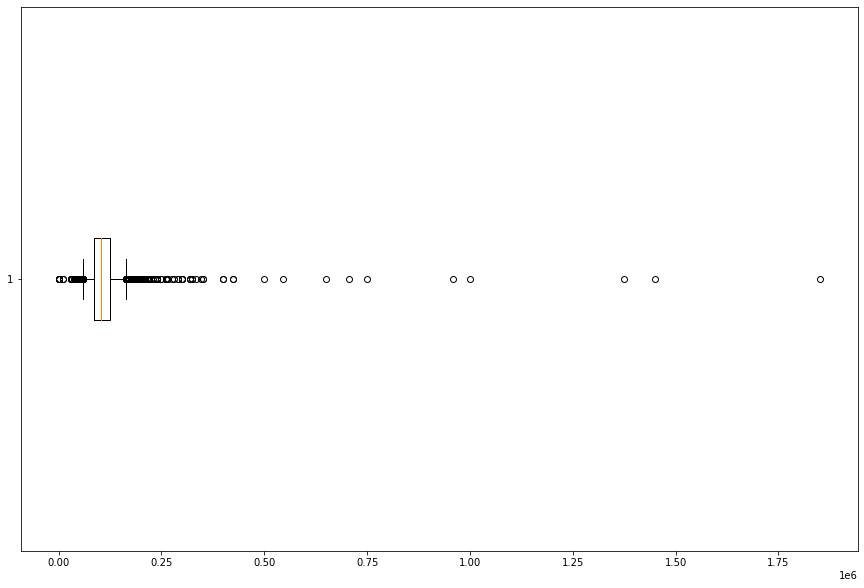

In [5]:
plt.figure(figsize = (15,10))
ax = plt.boxplot(data2["SalaryUSD"], whis=[5,95], vert=False)
plt.show()


Text(0.5, 1.0, 'Salaire moyen')

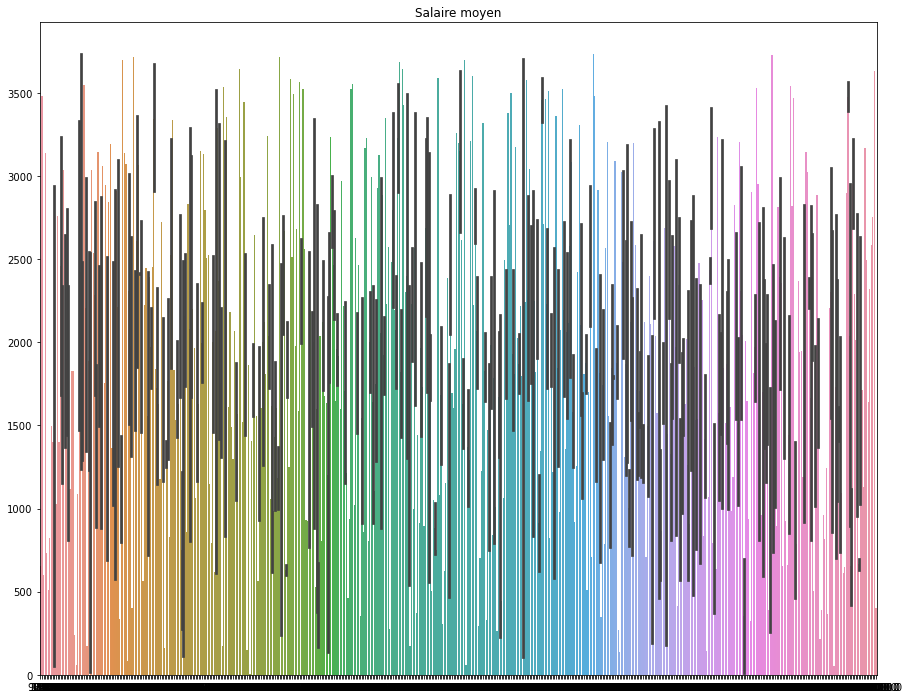

In [6]:
plt.figure(figsize=(15, 12))

sns.barplot(x=data2['SalaryUSD'], y=data2.index)

plt.xlabel("")

plt.title("Salaire moyen")


Tentative de graph pour les salaires moyen au Etats Unis, pas très lisible, je choisi donc de favoriser une réponse simple en récupèrent directement la moyenne de SalaryUSD.

In [7]:

print("le salaire moyen est de : {}" .format(data2.loc[:, 'SalaryUSD'].mean()))
   

le salaire moyen est de : 109497.43666934189


##Question 2 : le salaire median au Etats Unis

In [8]:
print("le salaire median est de : {}" .format(data2.loc[:, 'SalaryUSD'].median()))

le salaire median est de : 104000.0


In [21]:
def to_k_usd(x):
    return str(int((x / 1000))) + "K $"

salary_mean = data2["SalaryUSD"].mean()
salary_med = data2["SalaryUSD"].median()
salary_var = data2["SalaryUSD"].var(ddof=0)
salary_std = data2["SalaryUSD"].std(ddof=0)
salary_cv = salary_std / salary_mean

print("Le salaire annuel moyen aux USA est de {} et le salaire médian est de {}".format(to_k_usd(salary_mean), to_k_usd(salary_med)))
print("Son écart type des de {}".format(to_k_usd(salary_std)))
print("Le coefficient de variation de Salary USD est {:.2f}".format(salary_cv))      

Le salaire annuel moyen aux USA est de 109K $ et le salaire médian est de 104K $
Son écart type des de 61K $
Le coefficient de variation de Salary USD est 0.56


##Question 3 : Le salaire moyen en fonction du job title

Text(0.5, 1.0, 'Salaire moyen selon les différents métier')

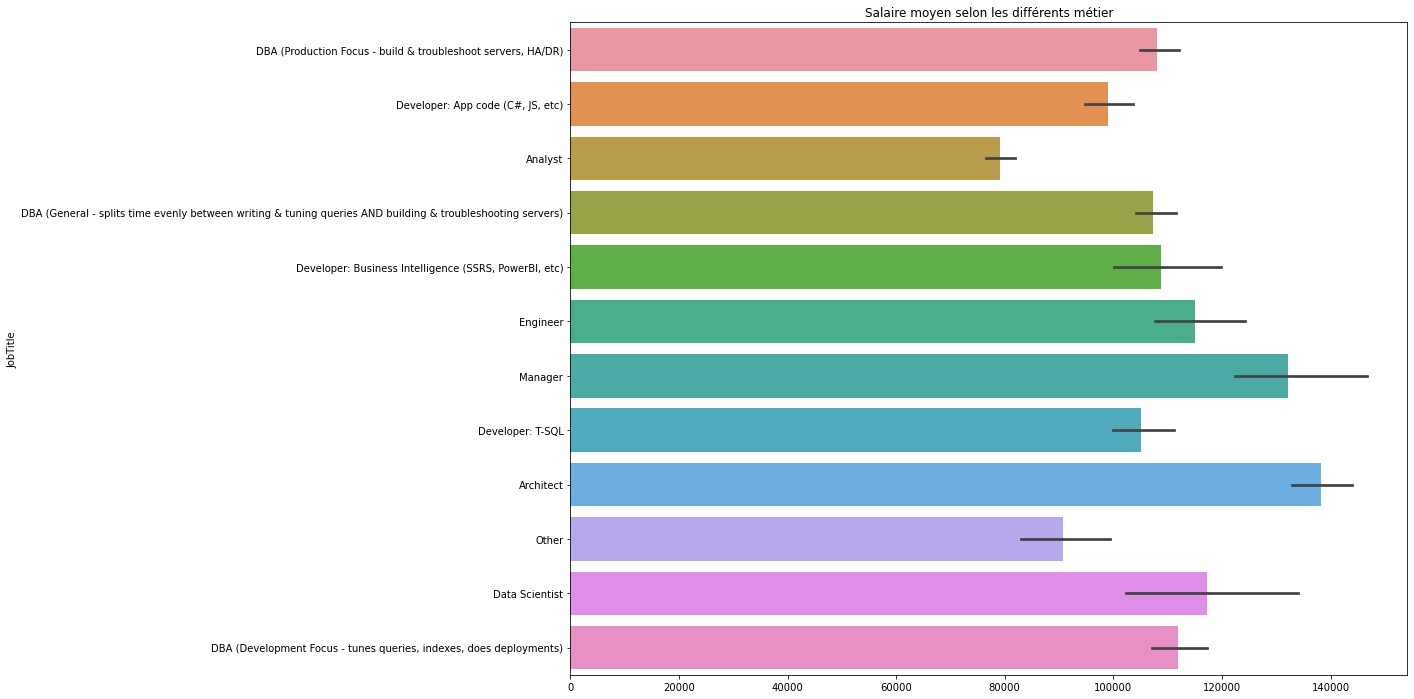

In [9]:
plt.figure(figsize=(15,12))


sns.barplot(x=data2['SalaryUSD'], y=data2.JobTitle)


plt.xlabel("")

plt.title("Salaire moyen selon les différents métier")


    Graphique qui montre le salaire moyen entre les "jobTittle" par sécurité et pour vérifier ma réponse j'ai sorti juste en dessous les réponse et nous pouvons voir que cela correspond au graphique

In [10]:
data2.groupby("JobTitle").SalaryUSD.mean()






JobTitle
Analyst                                                                                                        79074.818868
Architect                                                                                                     138151.431973
DBA (Development Focus - tunes queries, indexes, does deployments)                                            111813.386831
DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)    107376.256048
DBA (Production Focus - build & troubleshoot servers, HA/DR)                                                  108027.862917
Data Scientist                                                                                                117325.000000
Developer: App code (C#, JS, etc)                                                                              98926.197425
Developer: Business Intelligence (SSRS, PowerBI, etc)                                                         108850.767588

#Voici le diagramme circulaire de la répartitions de ses jobtitles

Text(0.5, 1.0, 'JobTittle')

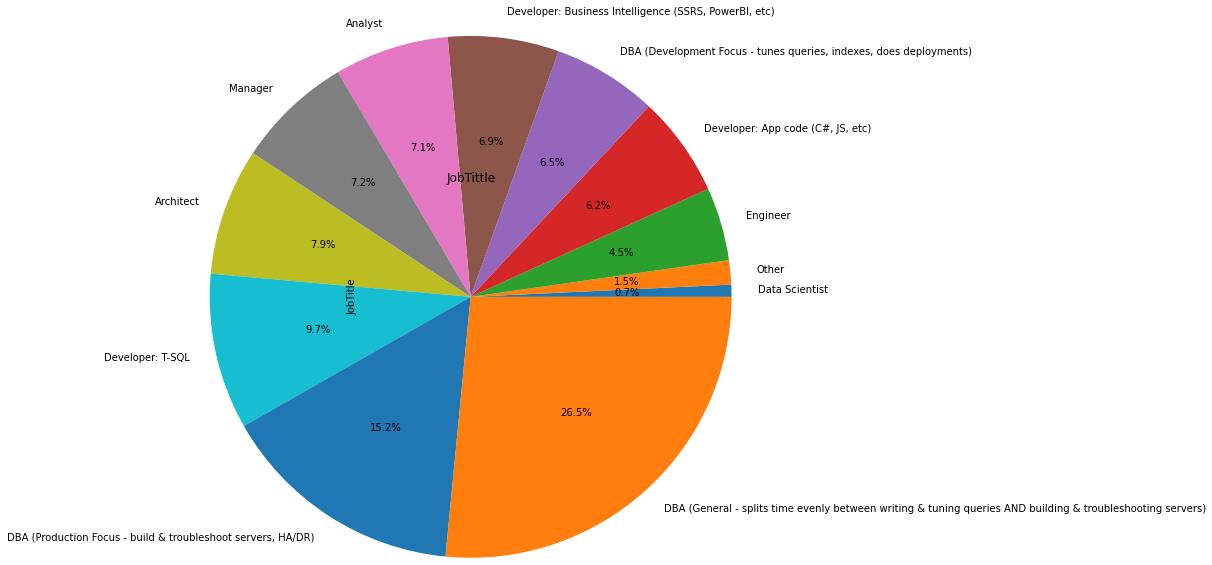

In [11]:
data = data2.groupby("JobTitle").JobTitle.count().sort_values()
data.plot.pie(autopct="%.1f%%", radius=3)
plt.title("JobTittle")

##Est-il préférable de travailler pour une seule ou plusieurs compagnies?

Text(0.5, 1.0, "Salaire moyen selon le nombre d'employeur")

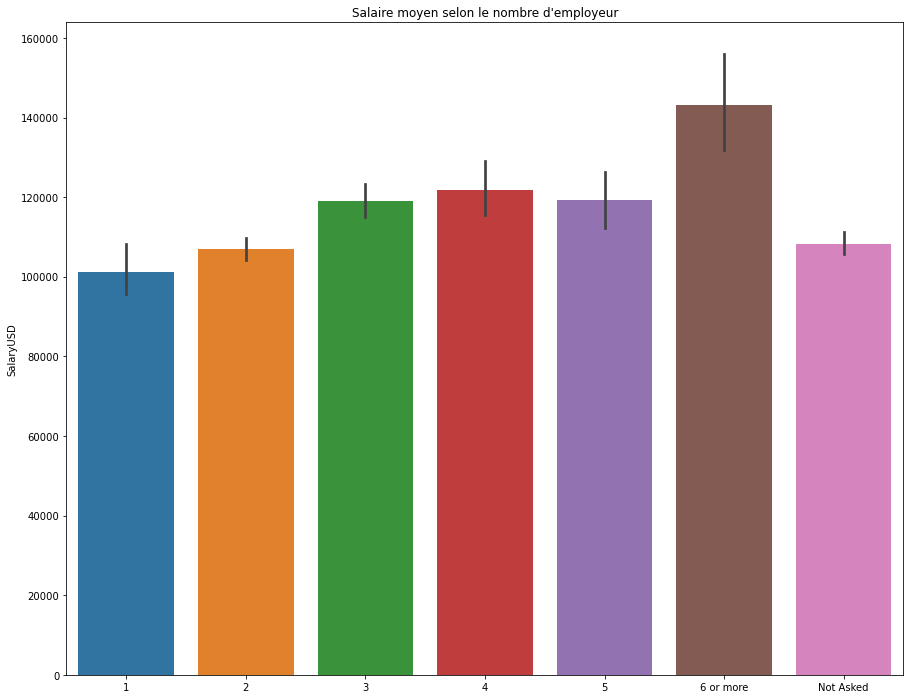

In [24]:

plt.figure(figsize=(15,12))


sns.barplot(y=data2['SalaryUSD'], x=data2.HowManyCompanies.sort_values())



plt.xlabel("")

plt.title("Salaire moyen selon le nombre d'employeur")


In [13]:
    data2.groupby("HowManyCompanies").SalaryUSD.mean()

HowManyCompanies
1 (this is the only company where I've had this kind of position)     101218.452188
2 (I worked at another similar position elsewhere before this one)    106995.408829
3                                                                     119138.349515
4                                                                     121919.783333
5                                                                     119388.369048
6 or more                                                             143103.168317
Not Asked                                                             108347.864184
Name: SalaryUSD, dtype: float64

Il est preferable de travailler pour plusieurs employeurs comme nous le montre le graphique, éffectivement il y a une difference de  41% de salaire entre la personne qui travaille pour un seul employeur et celle qui travaille pour 6 et + 

In [14]:
data2.groupby("CompanyEmployeesOverall").SalaryUSD.mean()

CompanyEmployeesOverall
1-5             160800.000000
100-249         120708.324675
1000 or more    103854.687050
250-499         101247.717949
500-999         109793.831325
6-99            103318.466667
Not Asked       109903.786825
Name: SalaryUSD, dtype: float64

##Le nombre de personne dans son équipe a-t-il une influence sur votre salaire?

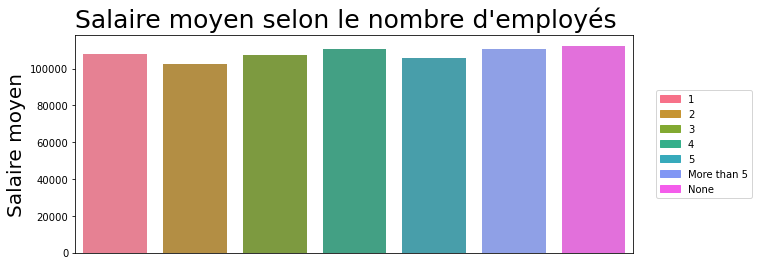

In [15]:
# plt.figure(figsize=(15,12))


# sns.barplot(y=data2['SalaryUSD'], x=data2.OtherPeopleOnYourTeam)



# plt.xlabel("Nombre d'employé")

# plt.title("Salaire moyen selon le nombre d'employés")

seriesj = data2.groupby('OtherPeopleOnYourTeam').SalaryUSD.mean()

# create a color palette the length of the dataframe
colors = sns.color_palette('husl', n_colors=len(seriesj.index))

ax=sns.barplot(x=seriesj.index, y=seriesj.values, palette=colors)

fig = plt.gcf()
# Modifie la taille du graphique
fig.set_size_inches(10,4)
# Ajout du titre
fig.suptitle("Salaire moyen selon le nombre d'employés", fontsize=25)
# Suppresion du label pour l'axe x et ajout du label pour l'axe y
plt.xlabel("");
plt.ylabel("Salaire moyen", fontsize=20, rotation=90)
# Suppression des ticks de l'abscisse
ax.tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

# create color map with colors and df.names
cmap = dict(zip(seriesj.index, colors))
# create the rectangles for the legend
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
# add the legend
plt.legend(handles=patches, bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0);




Comme le graphique le montre (code repris de tanguy ) le salaire moyen reste relativement le même donc non le salaire n'est pas influencé par le nombres d'employés dans l'équipe.

##Le nombre d'année d'expérience dans ce type d'emploi a t il une influence sur votre salaire?

Text(0.5, 1.0, "Salaire moyen selon l'année d'expérience")

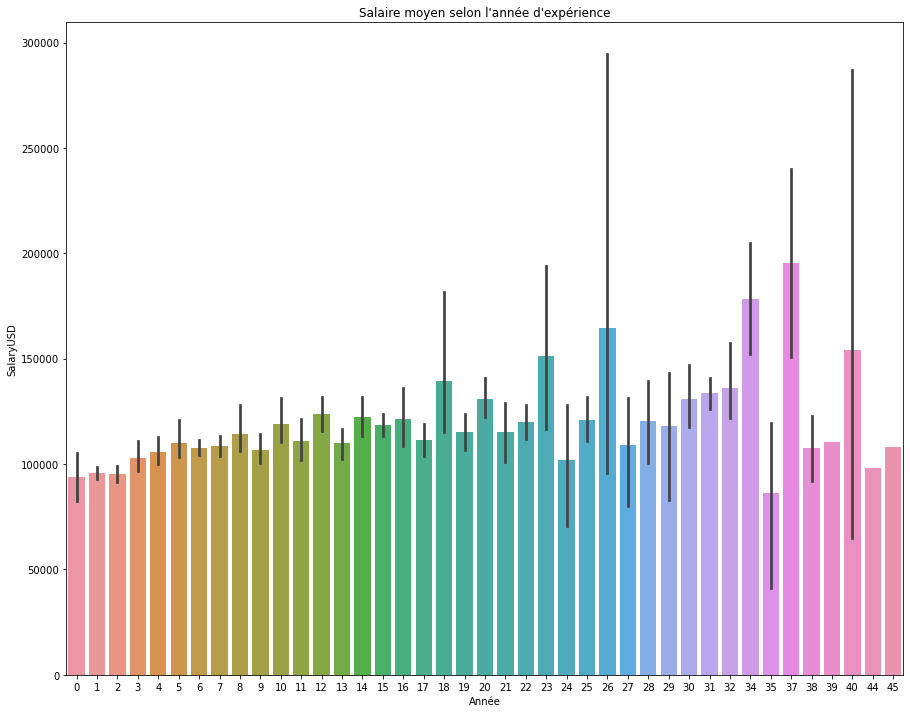

In [16]:
plt.figure(figsize=(15,12))


sns.barplot(y=data2['SalaryUSD'], x=data2.YearsWithThisTypeOfJob)



plt.xlabel("Année")

plt.title("Salaire moyen selon l'année d'expérience")



#Il y-a-t-il une inégalité salariale entre les hommes et les femmes dans les emplois liées à la data aux Etats Unis?


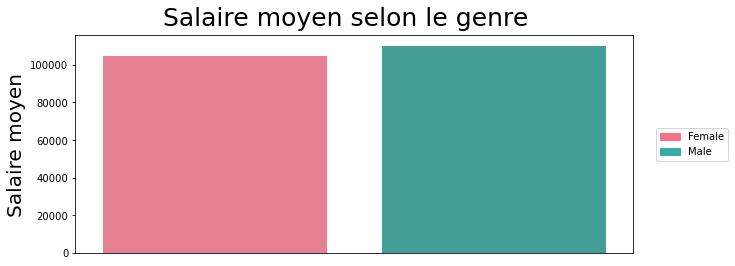

In [17]:
seriesj = data2.groupby('Gender').SalaryUSD.mean().sort_values()

# create a color palette the length of the dataframe
colors = sns.color_palette('husl', n_colors=len(seriesj.index))

ax=sns.barplot(x=seriesj.index, y=seriesj.values, palette=colors)

fig = plt.gcf()
# Modifie la taille du graphique
fig.set_size_inches(10,4)
# Ajout du titre
fig.suptitle("Salaire moyen selon le genre", fontsize=25)
# Suppresion du label pour l'axe x et ajout du label pour l'axe y
plt.xlabel("");
plt.ylabel("Salaire moyen", fontsize=20, rotation=90)
# Suppression des ticks de l'abscisse
ax.tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

# create color map with colors and df.names
cmap = dict(zip(seriesj.index, colors))
# create the rectangles for the legend
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
# add the legend
plt.legend(handles=patches, bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0);


In [18]:
data2.groupby("Gender").SalaryUSD.mean()

Gender
Female    104673.457330
Male      110169.353328
Name: SalaryUSD, dtype: float64

In [19]:
Il y a une différence de salaire de 5% entre les femmes et les hommes au Etats unis dans le domaines de la Data

SyntaxError: invalid syntax (<ipython-input-19-0664849a18f9>, line 1)